# Preprocessing

Downloaded data from [Ames-Housing (OpenML)](https://www.openml.org/search?type=data&sort=version&status=any&order=asc&exact_name=ames-housing&id=41211) as a .arff file. 

The aim of this notebook is to clean the data, make useful observations and store cleaned data in a processed csv file.

In [2]:
# --- Setup and Path Definition ---
import sys
from pathlib import Path

# Find the project root by looking for the .git folder
PROJECT_ROOT = Path.cwd().resolve().parents[1]

# Define key paths
DATA_PATH = PROJECT_ROOT / "src" / "data"
SRC_PATH = PROJECT_ROOT / "src"

# Add the 'src' directory to sys.path to allow for module imports
if str(SRC_PATH) not in sys.path:
    sys.path.append(str(SRC_PATH))

print(f"Project Root: {PROJECT_ROOT}")
print(f"Data Path:    {DATA_PATH}")
# --- End of Setup ---

Project Root: /Users/Faheem/Desktop/IITH/Sem 5 Textbooks and Extras/PRML/Project
Data Path:    /Users/Faheem/Desktop/IITH/Sem 5 Textbooks and Extras/PRML/Project/src/data


In [3]:
import pandas as pd
from scipy.io import arff

data, meta = arff.loadarff(DATA_PATH / 'raw' / 'file2ed11cebe25.arff')

df = pd.DataFrame(data)

In [3]:
# df.to_csv(DATA_PATH / 'raw' / 'raw_data.csv', index=False)

In [4]:
print(meta)

Dataset: 'x'
	MS_SubClass's type is nominal, range is ('One_Story_1946_and_Newer_All_Styles', 'One_Story_1945_and_Older', 'One_Story_with_Finished_Attic_All_Ages', 'One_and_Half_Story_Unfinished_All_Ages', 'One_and_Half_Story_Finished_All_Ages', 'Two_Story_1946_and_Newer', 'Two_Story_1945_and_Older', 'Two_and_Half_Story_All_Ages', 'Split_or_Multilevel', 'Split_Foyer', 'Duplex_All_Styles_and_Ages', 'One_Story_PUD_1946_and_Newer', 'One_and_Half_Story_PUD_All_Ages', 'Two_Story_PUD_1946_and_Newer', 'PUD_Multilevel_Split_Level_Foyer', 'Two_Family_conversion_All_Styles_and_Ages')
	MS_Zoning's type is nominal, range is ('Floating_Village_Residential', 'Residential_High_Density', 'Residential_Low_Density', 'Residential_Medium_Density', 'A_agr', 'C_all', 'I_all')
	Lot_Frontage's type is numeric
	Lot_Area's type is numeric
	Street's type is nominal, range is ('Grvl', 'Pave')
	Alley's type is nominal, range is ('Gravel', 'No_Alley_Access', 'Paved')
	Lot_Shape's type is nominal, range is ('Regular

In [4]:
for col in df.select_dtypes([object]):
    df[col] = df[col].apply(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

In [11]:
import numpy as np

missing_counts = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

missing_summary = pd.DataFrame({
    'count': missing_counts,
    'percent': missing_percent
})

print("Columns with missing values:")
print(missing_summary[missing_summary['count'] > 0].sort_values(by='percent', ascending=False))

Columns with missing values:
Empty DataFrame
Columns: [count, percent]
Index: []


> This is a RED FLAG! No missing values at all is highly suspicious, let's plot and check distributions of all the data to see whether it's really true or if the NaN values have just been stored as something else.

In [12]:
print("Unique values in 'Alley':")
print(df['Alley'].value_counts(dropna=False))
print("\n" + "="*30 + "\n")

print("Unique values in 'Fireplace_Qu':")
print(df['Fireplace_Qu'].value_counts(dropna=False))
print("\n" + "="*30 + "\n")

print("Unique values in 'Misc_Feature':")
print(df['Misc_Feature'].value_counts(dropna=False))
print("\n" + "="*30 + "\n")

print("Unique values in 'PoolQC':")
print(df['Pool_QC'].value_counts(dropna=False))

Unique values in 'Alley':
Alley
No_Alley_Access    2732
Gravel              120
Paved                78
Name: count, dtype: int64


Unique values in 'Fireplace_Qu':
Fireplace_Qu
No_Fireplace    1422
Good             744
Typical          600
Fair              75
Poor              46
Excellent         43
Name: count, dtype: int64


Unique values in 'Misc_Feature':
Misc_Feature
None    2824
Shed      95
Gar2       5
Othr       4
Elev       1
TenC       1
Name: count, dtype: int64


Unique values in 'PoolQC':
Pool_QC
No_Pool      2917
Excellent       4
Good            4
Typical         3
Fair            2
Name: count, dtype: int64


These columns show that it need not be necessary that 'None' / 'No_xxx' or similar means we should replace them with numpy.nan. This is valuable information too.

Let's plot and look at the distributions for all the columns in our dataset.

In [5]:
import matplotlib.pyplot as plt

def inspect_dataframe(df):
    for col in df.columns:
        dtype = df[col].dtype
        print(f"\n=== Column: {col} | dtype: {dtype} ===")

        if pd.api.types.is_object_dtype(dtype):
            # Show top value counts (including possible "fake" NaNs)
            print(df[col].value_counts(dropna=False).head(20))

        elif pd.api.types.is_numeric_dtype(dtype):
            # Plot histogram for numeric columns
            plt.figure(figsize=(6, 3))
            df[col].hist(bins=30, edgecolor='black')
            plt.title(f"{col} (numeric distribution)")
            plt.xlabel(col)
            plt.ylabel("Count")
            plt.grid(False)
            plt.show()

        else:
            print(f"Skipping column '{col}' of dtype {dtype}")



=== Column: MS_SubClass | dtype: object ===
MS_SubClass
One_Story_1946_and_Newer_All_Styles          1079
Two_Story_1946_and_Newer                      575
One_and_Half_Story_Finished_All_Ages          287
One_Story_PUD_1946_and_Newer                  192
One_Story_1945_and_Older                      139
Two_Story_PUD_1946_and_Newer                  129
Two_Story_1945_and_Older                      128
Split_or_Multilevel                           118
Duplex_All_Styles_and_Ages                    109
Two_Family_conversion_All_Styles_and_Ages      61
Split_Foyer                                    48
Two_and_Half_Story_All_Ages                    23
One_and_Half_Story_Unfinished_All_Ages         18
PUD_Multilevel_Split_Level_Foyer               17
One_Story_with_Finished_Attic_All_Ages          6
One_and_Half_Story_PUD_All_Ages                 1
Name: count, dtype: int64

=== Column: MS_Zoning | dtype: object ===
MS_Zoning
Residential_Low_Density         2273
Residential_Medium_Density 

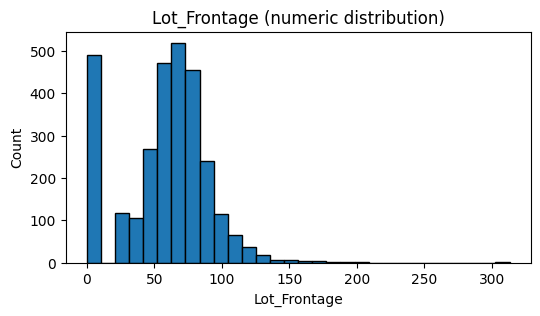


=== Column: Lot_Area | dtype: float64 ===


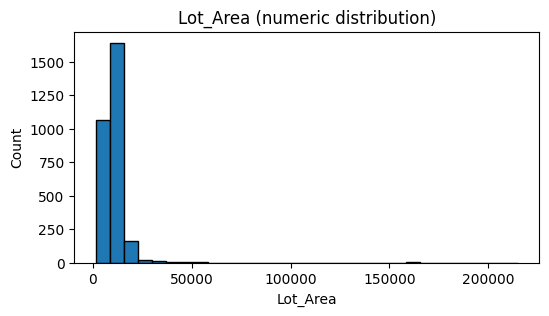


=== Column: Street | dtype: object ===
Street
Pave    2918
Grvl      12
Name: count, dtype: int64

=== Column: Alley | dtype: object ===
Alley
No_Alley_Access    2732
Gravel              120
Paved                78
Name: count, dtype: int64

=== Column: Lot_Shape | dtype: object ===
Lot_Shape
Regular                 1859
Slightly_Irregular       979
Moderately_Irregular      76
Irregular                 16
Name: count, dtype: int64

=== Column: Land_Contour | dtype: object ===
Land_Contour
Lvl    2633
HLS     120
Bnk     117
Low      60
Name: count, dtype: int64

=== Column: Utilities | dtype: object ===
Utilities
AllPub    2927
NoSewr       2
NoSeWa       1
Name: count, dtype: int64

=== Column: Lot_Config | dtype: object ===
Lot_Config
Inside     2140
Corner      511
CulDSac     180
FR2          85
FR3          14
Name: count, dtype: int64

=== Column: Land_Slope | dtype: object ===
Land_Slope
Gtl    2789
Mod     125
Sev      16
Name: count, dtype: int64

=== Column: Neighborhood | 

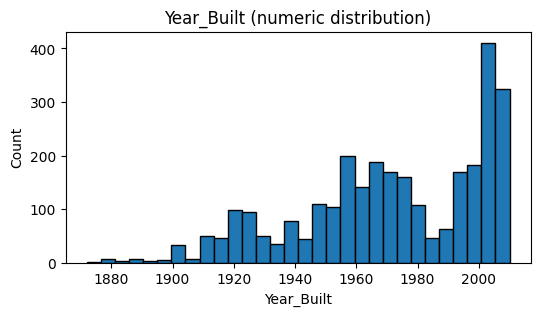


=== Column: Year_Remod_Add | dtype: float64 ===


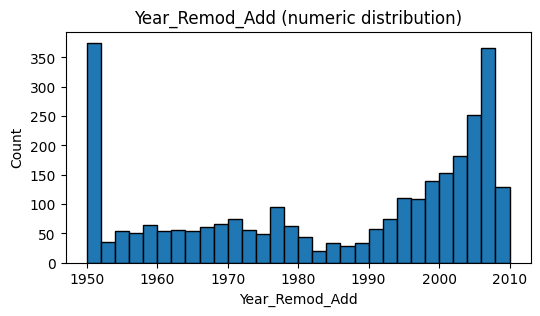


=== Column: Roof_Style | dtype: object ===
Roof_Style
Gable      2321
Hip         551
Gambrel      22
Flat         20
Mansard      11
Shed          5
Name: count, dtype: int64

=== Column: Roof_Matl | dtype: object ===
Roof_Matl
CompShg    2887
Tar&Grv      23
WdShake       9
WdShngl       7
Membran       1
ClyTile       1
Roll          1
Metal         1
Name: count, dtype: int64

=== Column: Exterior_1st | dtype: object ===
Exterior_1st
VinylSd    1026
MetalSd     450
HdBoard     442
Wd Sdng     420
Plywood     221
CemntBd     126
BrkFace      88
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
CBlock        2
Stone         2
PreCast       1
ImStucc       1
Name: count, dtype: int64

=== Column: Exterior_2nd | dtype: object ===
Exterior_2nd
VinylSd    1015
MetalSd     447
HdBoard     406
Wd Sdng     397
Plywood     274
CmentBd     126
Wd Shng      81
Stucco       47
BrkFace      47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn 

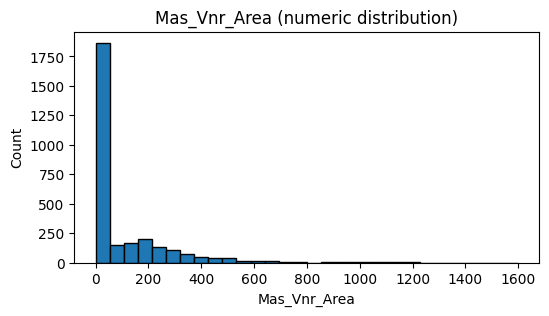


=== Column: Exter_Qual | dtype: object ===
Exter_Qual
Typical      1799
Good          989
Excellent     107
Fair           35
Name: count, dtype: int64

=== Column: Exter_Cond | dtype: object ===
Exter_Cond
Typical      2549
Good          299
Fair           67
Excellent      12
Poor            3
Name: count, dtype: int64

=== Column: Foundation | dtype: object ===
Foundation
PConc     1310
CBlock    1244
BrkTil     311
Slab        49
Stone       11
Wood         5
Name: count, dtype: int64

=== Column: Bsmt_Qual | dtype: object ===
Bsmt_Qual
Typical        1283
Good           1219
Excellent       258
Fair             88
No_Basement      80
Poor              2
Name: count, dtype: int64

=== Column: Bsmt_Cond | dtype: object ===
Bsmt_Cond
Typical        2616
Good            122
Fair            104
No_Basement      80
Poor              5
Excellent         3
Name: count, dtype: int64

=== Column: Bsmt_Exposure | dtype: object ===
Bsmt_Exposure
No             1906
Av              418
Gd    

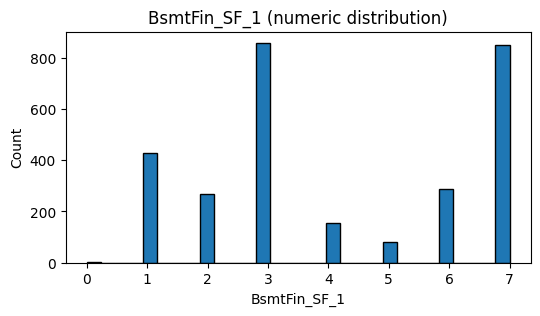


=== Column: BsmtFin_Type_2 | dtype: object ===
BsmtFin_Type_2
Unf            2499
Rec             106
LwQ              89
No_Basement      81
BLQ              68
ALQ              53
GLQ              34
Name: count, dtype: int64

=== Column: BsmtFin_SF_2 | dtype: float64 ===


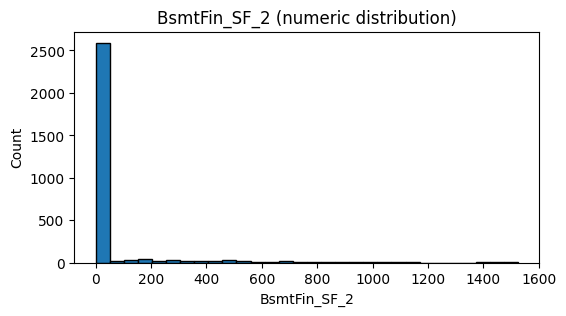


=== Column: Bsmt_Unf_SF | dtype: float64 ===


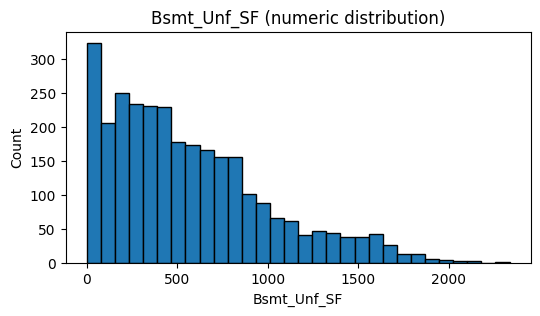


=== Column: Total_Bsmt_SF | dtype: float64 ===


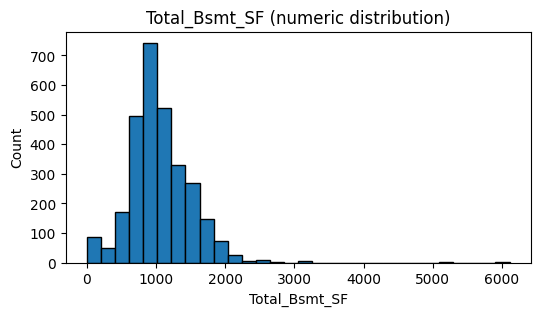


=== Column: Heating | dtype: object ===
Heating
GasA     2885
GasW       27
Grav        9
Wall        6
OthW        2
Floor       1
Name: count, dtype: int64

=== Column: Heating_QC | dtype: object ===
Heating_QC
Excellent    1495
Typical       864
Good          476
Fair           92
Poor            3
Name: count, dtype: int64

=== Column: Central_Air | dtype: object ===
Central_Air
Y    2734
N     196
Name: count, dtype: int64

=== Column: Electrical | dtype: object ===
Electrical
SBrkr      2682
FuseA       188
FuseF        50
FuseP         8
Unknown       1
Mix           1
Name: count, dtype: int64

=== Column: First_Flr_SF | dtype: float64 ===


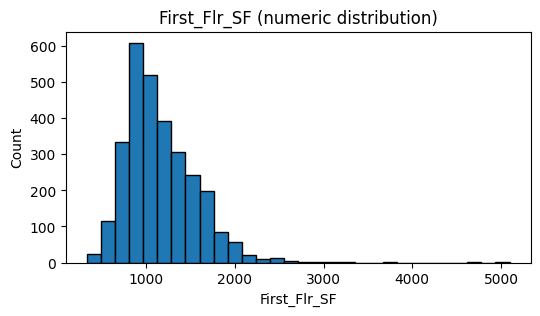


=== Column: Second_Flr_SF | dtype: float64 ===


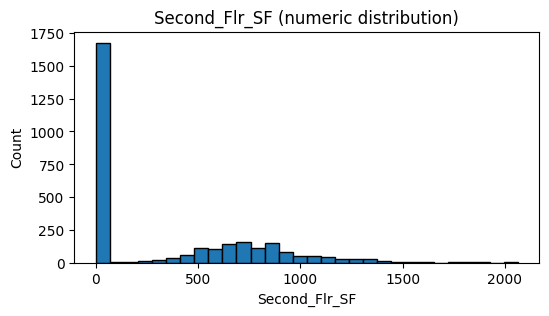


=== Column: Low_Qual_Fin_SF | dtype: float64 ===


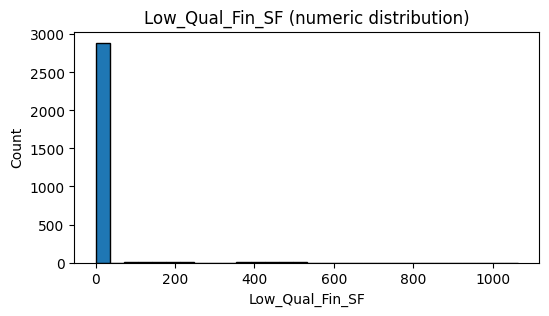


=== Column: Gr_Liv_Area | dtype: float64 ===


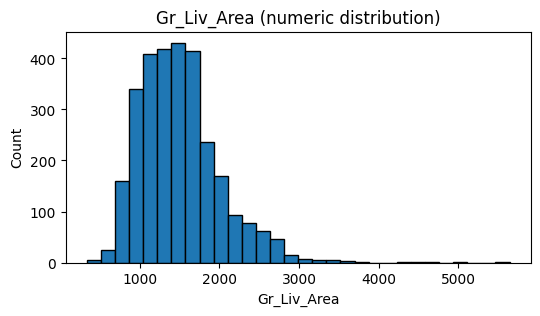


=== Column: Bsmt_Full_Bath | dtype: float64 ===


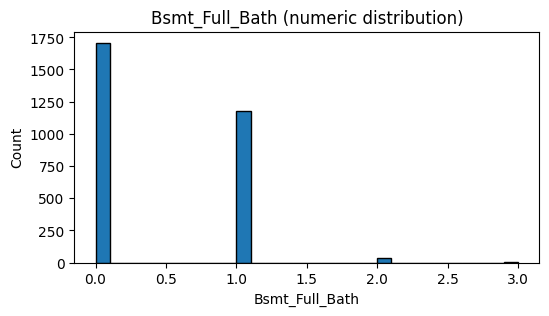


=== Column: Bsmt_Half_Bath | dtype: float64 ===


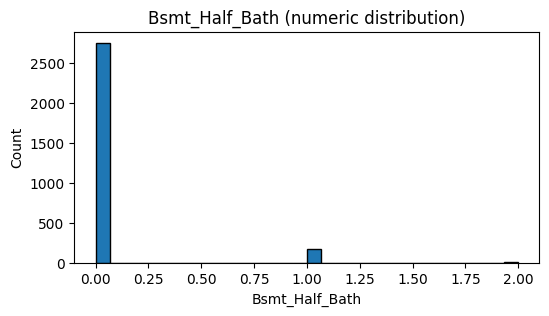


=== Column: Full_Bath | dtype: float64 ===


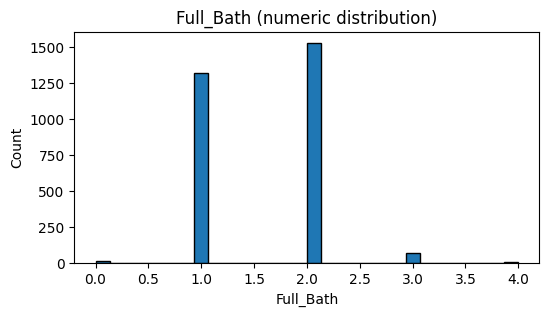


=== Column: Half_Bath | dtype: float64 ===


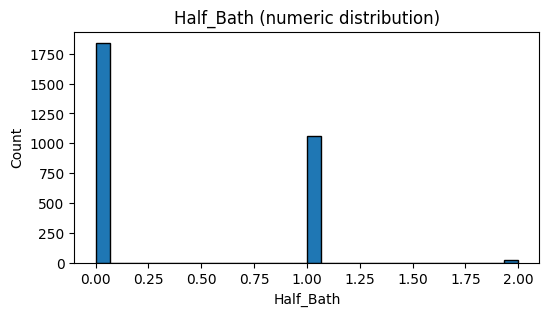


=== Column: Bedroom_AbvGr | dtype: float64 ===


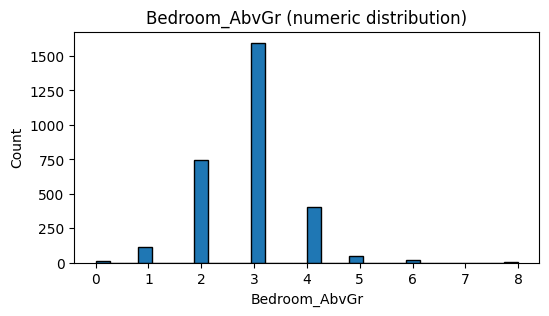


=== Column: Kitchen_AbvGr | dtype: float64 ===


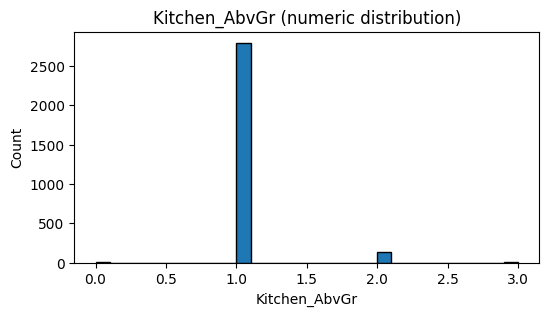


=== Column: Kitchen_Qual | dtype: object ===
Kitchen_Qual
Typical      1494
Good         1160
Excellent     205
Fair           70
Poor            1
Name: count, dtype: int64

=== Column: TotRms_AbvGrd | dtype: float64 ===


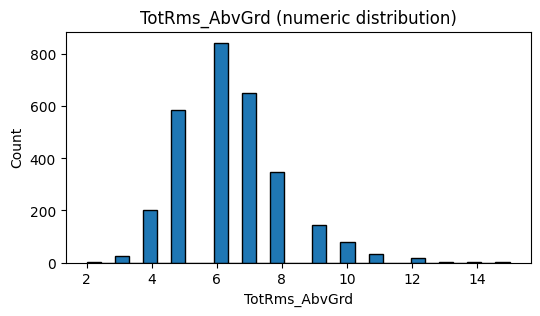


=== Column: Functional | dtype: object ===
Functional
Typ     2728
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Sal        2
Name: count, dtype: int64

=== Column: Fireplaces | dtype: float64 ===


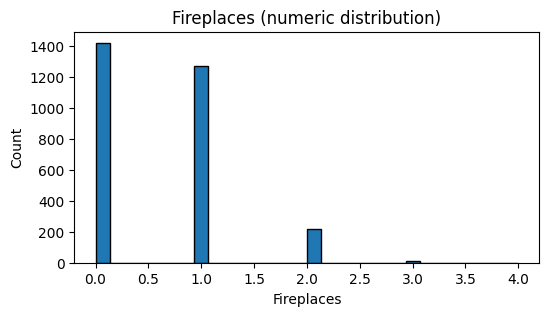


=== Column: Fireplace_Qu | dtype: object ===
Fireplace_Qu
No_Fireplace    1422
Good             744
Typical          600
Fair              75
Poor              46
Excellent         43
Name: count, dtype: int64

=== Column: Garage_Type | dtype: object ===
Garage_Type
Attchd                 1731
Detchd                  782
BuiltIn                 186
No_Garage               157
Basment                  36
More_Than_Two_Types      23
CarPort                  15
Name: count, dtype: int64

=== Column: Garage_Finish | dtype: object ===
Garage_Finish
Unf          1231
RFn           812
Fin           728
No_Garage     159
Name: count, dtype: int64

=== Column: Garage_Cars | dtype: float64 ===


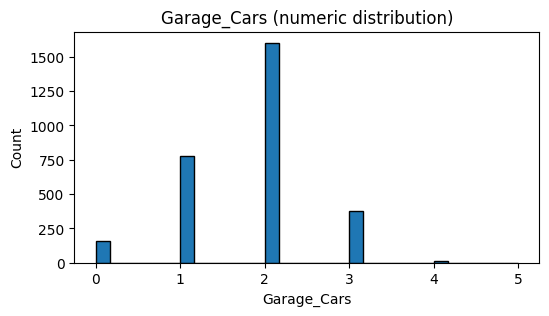


=== Column: Garage_Area | dtype: float64 ===


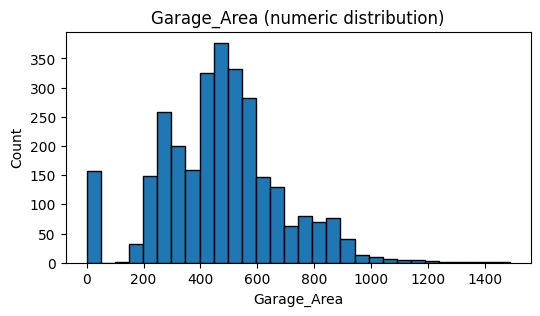


=== Column: Garage_Qual | dtype: object ===
Garage_Qual
Typical      2615
No_Garage     159
Fair          124
Good           24
Poor            5
Excellent       3
Name: count, dtype: int64

=== Column: Garage_Cond | dtype: object ===
Garage_Cond
Typical      2665
No_Garage     159
Fair           74
Good           15
Poor           14
Excellent       3
Name: count, dtype: int64

=== Column: Paved_Drive | dtype: object ===
Paved_Drive
Paved               2652
Dirt_Gravel          216
Partial_Pavement      62
Name: count, dtype: int64

=== Column: Wood_Deck_SF | dtype: float64 ===


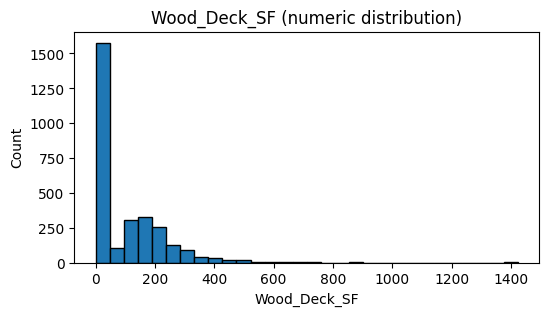


=== Column: Open_Porch_SF | dtype: float64 ===


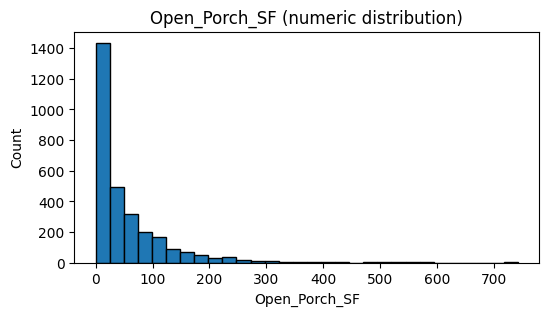


=== Column: Enclosed_Porch | dtype: float64 ===


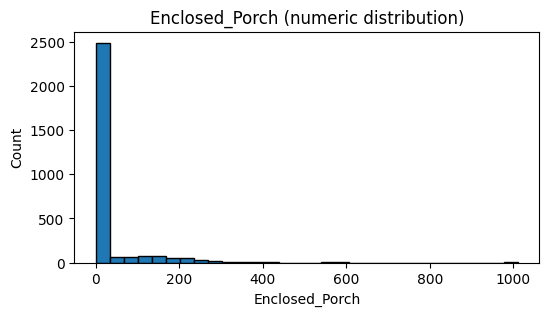


=== Column: Three_season_porch | dtype: float64 ===


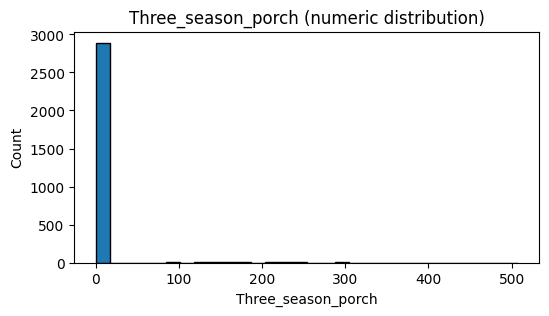


=== Column: Screen_Porch | dtype: float64 ===


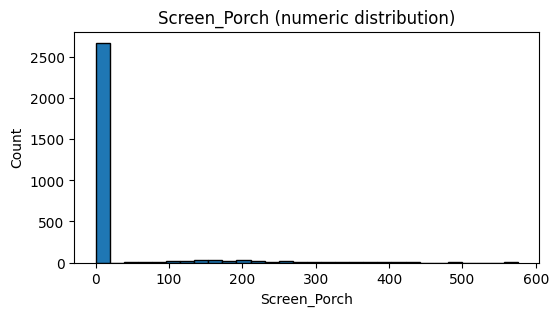


=== Column: Pool_Area | dtype: float64 ===


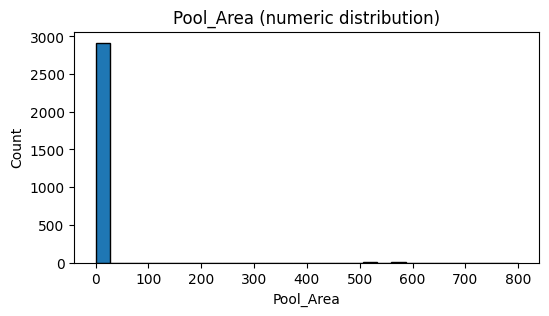


=== Column: Pool_QC | dtype: object ===
Pool_QC
No_Pool      2917
Excellent       4
Good            4
Typical         3
Fair            2
Name: count, dtype: int64

=== Column: Fence | dtype: object ===
Fence
No_Fence             2358
Minimum_Privacy       330
Good_Privacy          118
Good_Wood             112
Minimum_Wood_Wire      12
Name: count, dtype: int64

=== Column: Misc_Feature | dtype: object ===
Misc_Feature
None    2824
Shed      95
Gar2       5
Othr       4
Elev       1
TenC       1
Name: count, dtype: int64

=== Column: Misc_Val | dtype: float64 ===


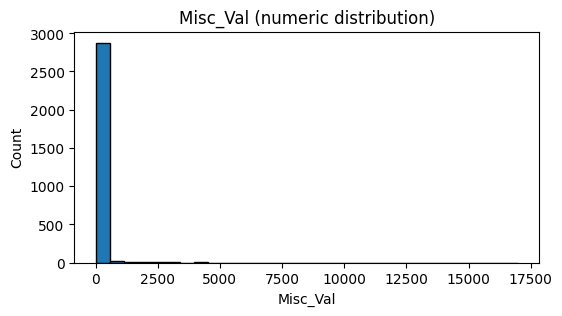


=== Column: Mo_Sold | dtype: float64 ===


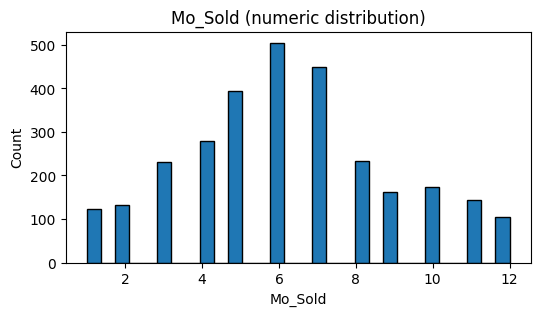


=== Column: Year_Sold | dtype: float64 ===


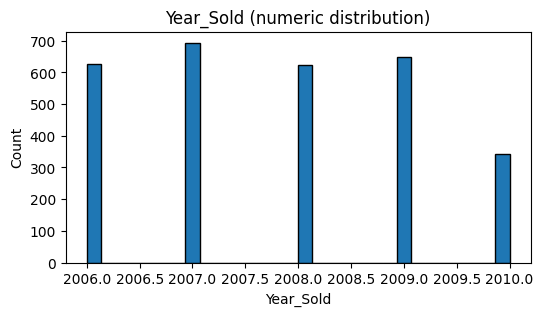


=== Column: Sale_Type | dtype: object ===
Sale_Type
WD       2536
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
VWD         1
Name: count, dtype: int64

=== Column: Sale_Condition | dtype: object ===
Sale_Condition
Normal     2413
Partial     245
Abnorml     190
Family       46
Alloca       24
AdjLand      12
Name: count, dtype: int64

=== Column: Sale_Price | dtype: float64 ===


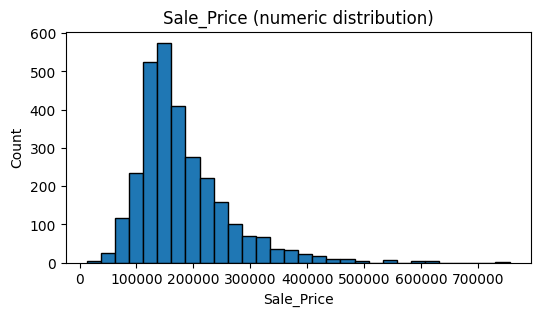


=== Column: Longitude | dtype: float64 ===


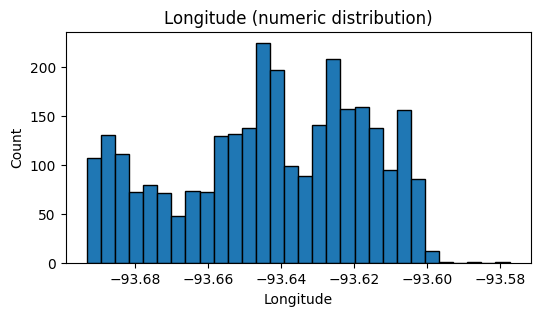


=== Column: Latitude | dtype: float64 ===


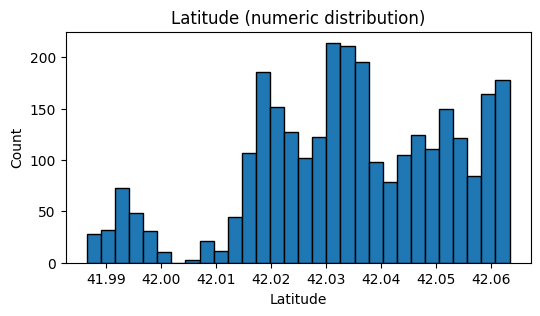

In [14]:
inspect_dataframe(df)

Manually going through the above output, I note the following columns which are of interest:

1. Lot_Frontage (around 500 0 values)
2. Condition_2 and Condition_1 (2900 and 2522 values all from one category)
3. Year_Remod_Add (350+ rows in 1950??)
4. Roof_Matl (2887 rows in CompShg?)
5. Mas_Vnr_Area (1750+? Interesting to note that Mas_Vnr_Type also has 1775 None values)
6. Second_Flr_SF (1500+ rows with 0?)
7. Low_Qual_Fin (Almost 3000 rows with count = 0)
8. Garage_Area (150ish 0 rows)
9. Wood_Deck_SF (1500+ 0's)
10. Pool_QC and Pool_Area (kind of matching up in terms of number of no pools)


One thing I'm considering is renaming all the No_Pool or No_Fence or whatever to a uniform "None" value.

I also notice that Sale_Price is right skewed. I apply a log transformation to it to make it more normally distributed.

For the sake of Bayesian Project, I plan on only using the Gr_Liv_Area, Overall_Qual and Year_Built columns to predict SalePrice. Hence, I will only clean those columns and store them in a separate csv for the Bayesian Project.


=== Column: Gr_Liv_Area | dtype: float64 ===


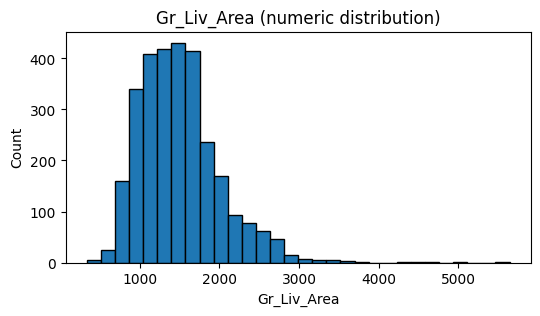


=== Column: Overall_Qual | dtype: object ===
Overall_Qual
Average           825
Above_Average     732
Good              602
Very_Good         350
Below_Average     226
Excellent         107
Fair               40
Very_Excellent     31
Poor               13
Very_Poor           4
Name: count, dtype: int64

=== Column: Year_Built | dtype: float64 ===


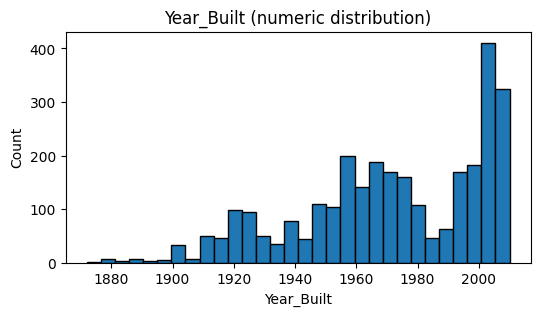


=== Column: Neighborhood | dtype: object ===
Neighborhood
North_Ames                                 443
College_Creek                              267
Old_Town                                   239
Edwards                                    194
Somerset                                   182
Northridge_Heights                         166
Gilbert                                    165
Sawyer                                     151
Northwest_Ames                             131
Sawyer_West                                125
Mitchell                                   114
Brookside                                  108
Crawford                                   103
Iowa_DOT_and_Rail_Road                      93
Timberland                                  72
Northridge                                  71
Stone_Brook                                 51
South_and_West_of_Iowa_State_University     48
Clear_Creek                                 44
Meadow_Village                              37
N

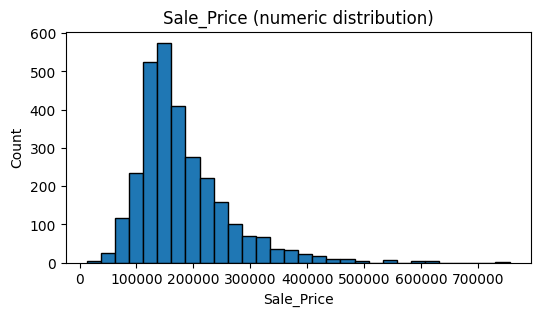

In [15]:
import numpy as np

# Create a new dataframe with selected columns for Bayesian analysis
selected_columns = ['Gr_Liv_Area', 'Overall_Qual', 'Year_Built', 'Neighborhood', 'Sale_Price']
df_bayesian = df[selected_columns].copy()

# Plot the distribution of every column in the new dataframe
inspect_dataframe(df_bayesian)

## Exporting Cleaned Data

I export the cleaned data to a csv file for use in future notebooks.

In [ ]:
# df_bayesian.to_csv(DATA_PATH / 'processed' / 'preprocessed_ames_data.csv', index=False)